In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib
import os
from ggplot import *

In [2]:
train = pd.read_csv(os.path.join('data','train.csv'), parse_dates=['Date'])
#train = pd.read_csv(os.path.join('data','train.csv'), parse_dates=['Date'], converters = {'StateHoliday': str})
test = pd.read_csv(os.path.join('data','test.csv'), parse_dates=['Date'])
store = pd.read_csv(os.path.join('data','store.csv'))

/home/dustin/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/pandas/io/parsers.py:1159: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


In [3]:
train.dtypes

Store                     int64
DayOfWeek                 int64
Date             datetime64[ns]
Sales                     int64
Customers                 int64
Open                      int64
Promo                     int64
StateHoliday             object
SchoolHoliday             int64
dtype: object

In [4]:
# why is StateHoliday an object? => the 0 label is present as both string and numeric
train.StateHoliday.value_counts()

0    855087
0    131072
a     20260
b      6690
c      4100
dtype: int64

In [5]:
# convert train.StateHolidy to string type
#train.StateHoliday = 
train.StateHoliday = train.StateHoliday.astype(str)

In [6]:
train.StateHoliday.value_counts()

0    986159
a     20260
b      6690
c      4100
dtype: int64

In [7]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [8]:
pd.unique(train.Store)

array([   1,    2,    3, ..., 1113, 1114, 1115])

In [9]:
test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1,1,0,0
1,2,3,4,2015-09-17,1,1,0,0
2,3,7,4,2015-09-17,1,1,0,0
3,4,8,4,2015-09-17,1,1,0,0
4,5,9,4,2015-09-17,1,1,0,0


In [10]:
train.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [11]:
# How many rows in the test set have Open == 0?
len(train[train.Open == 0].index)

# percentage of test set with Open == 0
len((train[train.Open == 0].index))/float(len(train.index))

0.16989330609540418

In [12]:
test.isnull().sum()

Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

In [13]:
# which stores have open == NA
test[test.Open.isnull()]

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
479,480,622,4,2015-09-17,NaN,1,0,0
1335,1336,622,3,2015-09-16,NaN,1,0,0
2191,2192,622,2,2015-09-15,NaN,1,0,0
3047,3048,622,1,2015-09-14,NaN,1,0,0
4759,4760,622,6,2015-09-12,NaN,0,0,0
5615,5616,622,5,2015-09-11,NaN,0,0,0
6471,6472,622,4,2015-09-10,NaN,0,0,0
7327,7328,622,3,2015-09-09,NaN,0,0,0
8183,8184,622,2,2015-09-08,NaN,0,0,0
9039,9040,622,1,2015-09-07,NaN,0,0,0


Competition admin Florian Knauer says the missing Open values for store 622 should be 0: https://www.kaggle.com/c/rossmann-store-sales/forums/t/17048/putting-stores-on-the-map?page=2.

14.5% of the test set have Open == 0, which are not counted in the loss.

In [14]:
# How many rows in the test set have Open == 0?
len(test[test.Open == 0].index)

# percentage of test set with Open == 0
len((test[test.Open == 0].index))/float(len(test.index))

0.14563862928348908

In [15]:
# are all stores in the test set also in the train set?
set(pd.unique(test.Store)) <= set(pd.unique(train.Store))

True

In [16]:
# are all stores in the train set also in the test set?
set(pd.unique(train.Store)) <= set(pd.unique(test.Store))

False

In [17]:
# how many stores in train are not in test?
len(set(pd.unique(train.Store)) - set(pd.unique(test.Store)))

259

In [18]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270,9,2008,0,NaN,NaN,NaN
1,2,a,a,570,11,2007,1,13,2010,"Jan,Apr,Jul,Oct"
2,3,a,a,14130,12,2006,1,14,2011,"Jan,Apr,Jul,Oct"
3,4,c,c,620,9,2009,0,NaN,NaN,NaN
4,5,a,a,29910,4,2015,0,NaN,NaN,NaN


In [19]:
train.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1017209.000000,1017209.000000,1017209.000000,1017209.000000,1017209.000000,1017209.000000,1017209.000000
mean,558.429727,3.998341,5773.818972,633.145946,0.830107,0.381515,0.178647
std,321.908651,1.997391,3849.926175,464.411734,0.375539,0.485759,0.383056
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,280.000000,2.000000,3727.000000,405.000000,1.000000,0.000000,0.000000
50%,558.000000,4.000000,5744.000000,609.000000,1.000000,0.000000,0.000000
75%,838.000000,6.000000,7856.000000,837.000000,1.000000,1.000000,0.000000
max,1115.000000,7.000000,41551.000000,7388.000000,1.000000,1.000000,1.000000


In [20]:
print 'earliest training date: {0}'.format(min(train.Date))
print 'latest training date: {0}'.format(max(train.Date))

earliest training date: 2013-01-01 00:00:00
latest training date: 2015-07-31 00:00:00


In [21]:
test.describe()

,Id,Store,DayOfWeek,Open,Promo,SchoolHoliday
count,41088.000000,41088.000000,41088.000000,41077.000000,41088.000000,41088.000000
mean,20544.500000,555.899533,3.979167,0.854322,0.395833,0.443487
std,11861.228267,320.274496,2.015481,0.352787,0.489035,0.496802
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,10272.750000,279.750000,2.000000,1.000000,0.000000,0.000000
50%,20544.500000,553.500000,4.000000,1.000000,0.000000,0.000000
75%,30816.250000,832.250000,6.000000,1.000000,1.000000,1.000000
max,41088.000000,1115.000000,7.000000,1.000000,1.000000,1.000000


In [22]:
print 'earliest test date: {0}'.format(min(test.Date))
print 'latest test date: {0}'.format(max(test.Date))

earliest test date: 2015-08-01 00:00:00
latest test date: 2015-09-17 00:00:00


In [23]:
store.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [24]:
store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [25]:
# of unique values per column
train.apply(lambda x: x.nunique())

Store             1115
DayOfWeek            7
Date               942
Sales            21734
Customers         4086
Open                 2
Promo                2
StateHoliday         4
SchoolHoliday        2
dtype: int64

In [26]:
test.apply(lambda x: x.nunique())

Id               41088
Store              856
DayOfWeek            7
Date                48
Open                 2
Promo                2
StateHoliday         2
SchoolHoliday        2
dtype: int64

In [27]:
train.StateHoliday.value_counts()

0    986159
a     20260
b      6690
c      4100
dtype: int64

In [28]:
test.StateHoliday.value_counts()

0    40908
a      180
dtype: int64

no b and c in test = no easter holiday and no christmas

In [29]:
# % of times in promo in train
train.Promo.value_counts() / len(train.index)

0    0.618485
1    0.381515
dtype: float64

In [30]:
# % promo in test
test.Promo.value_counts() / len(test.index)

0    0.604167
1    0.395833
dtype: float64

In [31]:
# there are 48 dates to be predicted for each of the 856 stores in test
test.groupby('Date').count().Id.value_counts()

856    48
dtype: int64

In [32]:
store.Assortment.value_counts()

a    593
c    513
b      9
dtype: int64

In [33]:
store.StoreType.value_counts()

a    602
d    348
c    148
b     17
dtype: int64

****

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x5194d10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x130b5550>]], dtype=object)

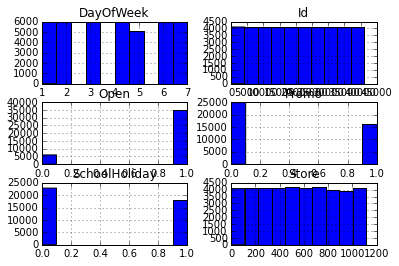

In [34]:
test.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x54cf210>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x6574210>]], dtype=object)

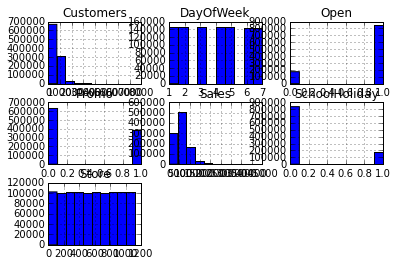

In [35]:
train.hist()

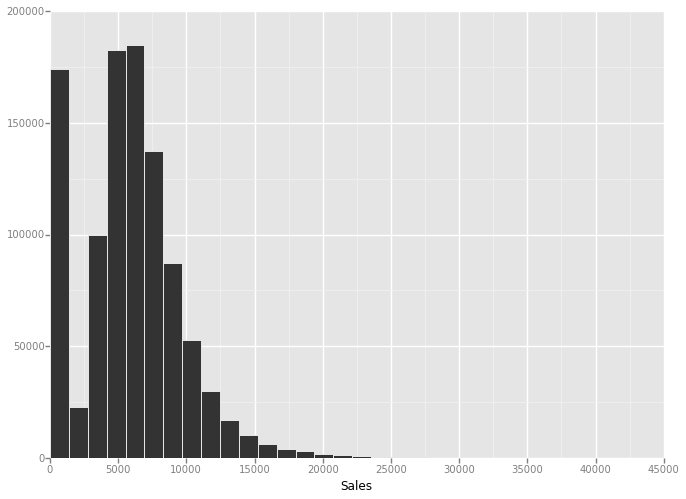

<ggplot: (6457117)>

In [50]:
ggplot(aes(x = 'Sales'), data = train) + geom_histogram()